### Number of nodes and edges

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

edges_df = pd.read_csv('/kaggle/working/filtered_edges.csv')
nodes_df = pd.read_csv('/kaggle/input/music-data/combined_dataset.csv')  


G = nx.from_pandas_edgelist(edges_df, 'id_0', 'id_1')

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 51002
Number of edges: 158232


### Degree Distribution Graph 

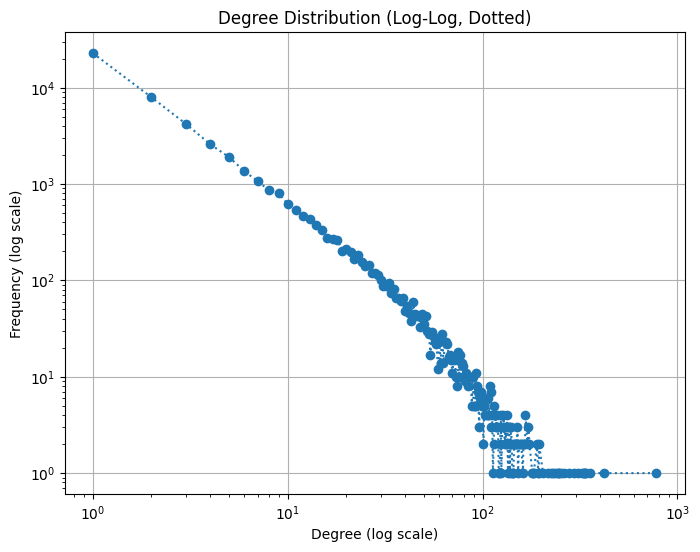

In [ ]:
edges_df = pd.read_csv('/kaggle/working/filtered_edges.csv')

G = nx.from_pandas_edgelist(edges_df, 'id_0', 'id_1')

degrees = dict(G.degree())
degree_counts = {}


for degree in degrees.values():
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

degree, count = zip(*sorted(degree_counts.items()))

plt.figure(figsize=(8, 6))
plt.plot(degree, count, 'o', linestyle='dotted')  
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution (Log-Log, Dotted)')
plt.grid(True)
plt.show()


### Clustering Cofficient vs Degree

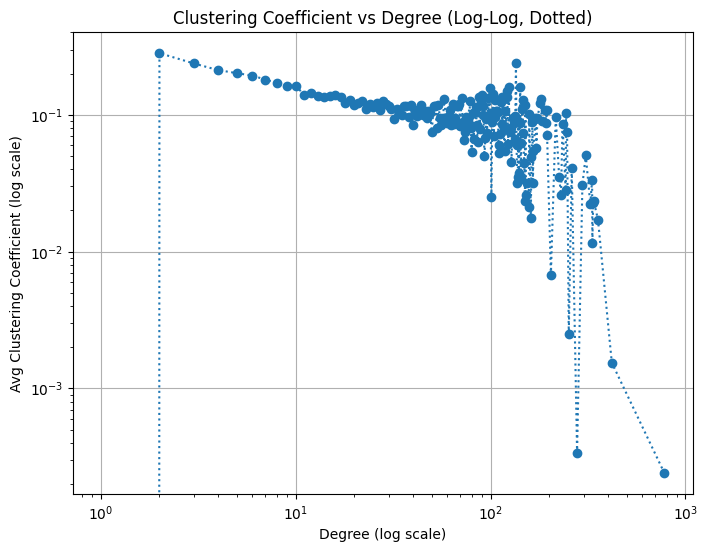

In [ ]:
clustering = nx.clustering(G)


deg_clust_pairs = [(degrees[node], clustering[node]) for node in G.nodes() if degrees[node] > 0]

from collections import defaultdict
deg_to_clust = defaultdict(list)
for d, c in deg_clust_pairs:
    deg_to_clust[d].append(c)

avg_clust_by_deg = {d: np.mean(cl) for d, cl in deg_to_clust.items()}


sorted_degrees, avg_clust = zip(*sorted(avg_clust_by_deg.items()))

plt.figure(figsize=(8, 6))
plt.plot(sorted_degrees, avg_clust, 'o', linestyle='dotted')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log scale)')
plt.ylabel('Avg Clustering Coefficient (log scale)')
plt.title('Clustering Coefficient vs Degree (Log-Log, Dotted)')
plt.grid(True)
plt.show()

### Extra data about graph

In [6]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Density: {nx.density(G):.4f}")
print(f"Is connected: {nx.is_connected(G)}")
if not nx.is_connected(G):
    print(f"Number of connected components: {nx.number_connected_components(G)}")
    largest_cc = max(nx.connected_components(G), key=len)
    print(f"Largest connected component size: {len(largest_cc)}")


Number of nodes: 51002
Number of edges: 158232
Density: 0.0001
Is connected: False
Number of connected components: 478
Largest connected component size: 49698


### Collaboration of top 10,000 artists by followers

Top artist graph: 8941 nodes, 49562 edges


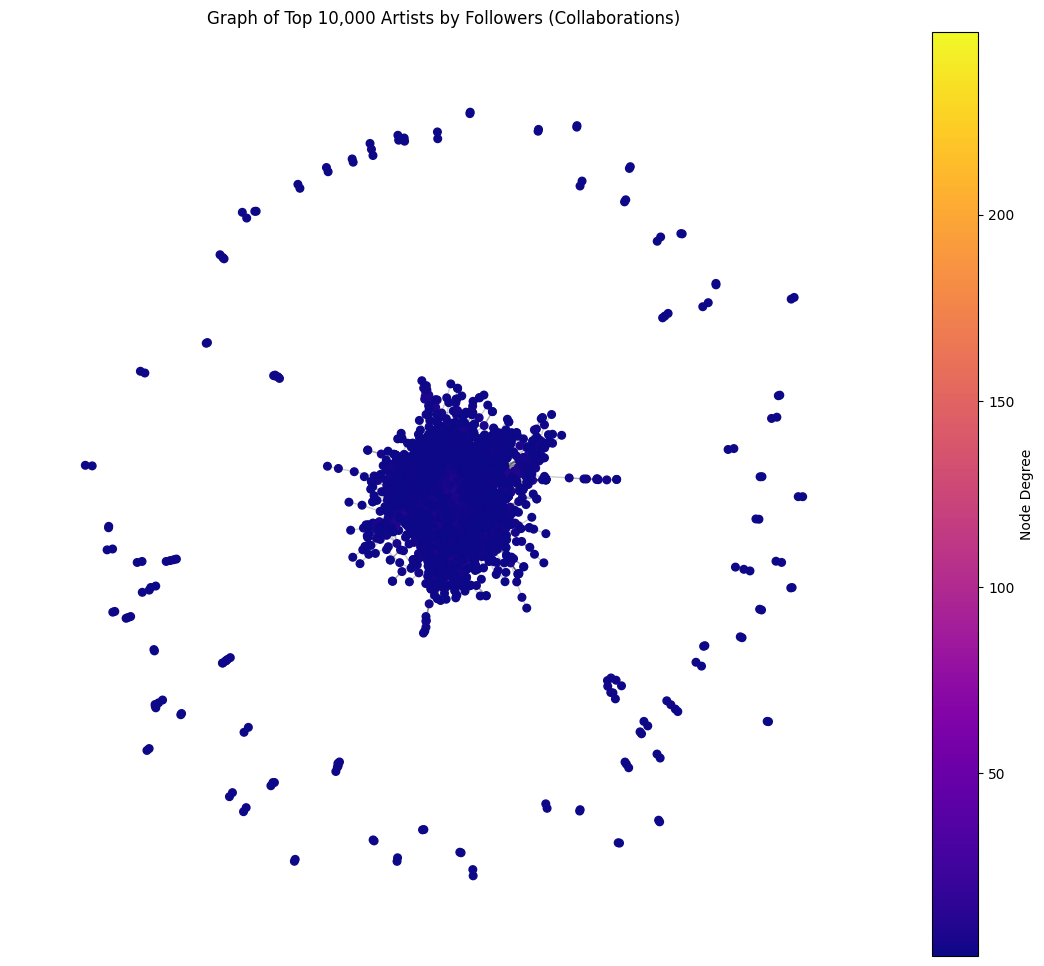

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

combined = pd.read_csv('/kaggle/input/music-data/combined_dataset.csv')
edges_df = pd.read_csv('/kaggle/working/filtered_edges.csv')


top_nodes = combined.sort_values(by='followers', ascending=False).head(10000)
top_ids = set(top_nodes['spotify_id'])


top_edges = edges_df[edges_df['id_0'].isin(top_ids) & edges_df['id_1'].isin(top_ids)]

G_top = nx.from_pandas_edgelist(top_edges, 'id_0', 'id_1')

print(f"Top artist graph: {G_top.number_of_nodes()} nodes, {G_top.number_of_edges()} edges")

degree_dict = dict(G_top.degree())
node_color = [degree_dict[n] for n in G_top.nodes()]

plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G_top, seed=42)

nodes = nx.draw_networkx_nodes(G_top, pos, node_size=30, node_color=node_color, cmap=plt.cm.plasma)
nx.draw_networkx_edges(G_top, pos, alpha=0.2)

plt.colorbar(nodes, label='Node Degree')
plt.title("Graph of Top 10,000 Artists by Followers (Collaborations)")
plt.axis('off')
plt.show()


### Comparision of real netwok and random netwok

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

combined = pd.read_csv('/kaggle/input/music-data/combined_dataset.csv')
edges_df = pd.read_csv('/kaggle/working/filtered_edges.csv')

# Real graph
real_ids = set(combined['spotify_id'])
filtered_edges = edges_df[edges_df['id_0'].isin(real_ids) & edges_df['id_1'].isin(real_ids)]
G_real = nx.from_pandas_edgelist(filtered_edges, 'id_0', 'id_1')

n_nodes = G_real.number_of_nodes()
n_edges = G_real.number_of_edges()

# degree distribution of Real graph 
real_degrees = [d for n, d in G_real.degree()]
real_deg_count = np.bincount(real_degrees)
real_x = np.nonzero(real_deg_count)[0]
real_y = real_deg_count[real_x]

In [ ]:
# Random graphs: track values for std dev
degree_vals = defaultdict(list)

for _ in range(100):
    G_rand = nx.gnm_random_graph(n_nodes, n_edges)
    degs = [d for n, d in G_rand.degree()]
    deg_count = np.bincount(degs)
    for i, val in enumerate(deg_count):
        degree_vals[i].append(val)

# Average and std dev
avg_y = []
std_y = []
avg_x = []

for k in sorted(degree_vals.keys()):
    vals = degree_vals[k]
    avg_x.append(k)
    avg_y.append(np.mean(vals))
    std_y.append(np.std(vals))

### With 100 random networks

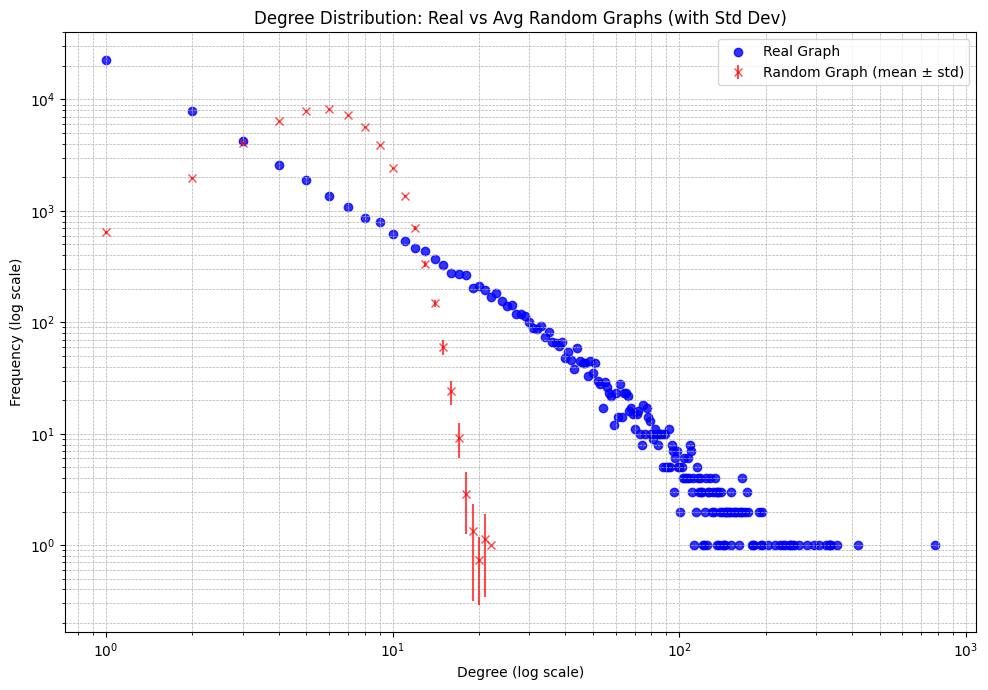

In [23]:
plt.figure(figsize=(10, 7))

# Real 
plt.scatter(real_x, real_y, label='Real Graph', alpha=0.8, color='blue')

# Random graph average with std deviation error bars
avg_y = np.array(avg_y)
std_y = np.array(std_y)
plt.errorbar(avg_x, avg_y, yerr=std_y, fmt='x', label='Random Graph (mean ± std)', color='red', alpha=0.7)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Degree Distribution: Real vs Avg Random Graphs (with Std Dev)")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

combined = pd.read_csv('/kaggle/input/music-data/combined_dataset.csv')
edges_df = pd.read_csv('/kaggle/working/filtered_edges.csv')

# real graph
real_ids = set(combined['spotify_id'])
filtered_edges = edges_df[edges_df['id_0'].isin(real_ids) & edges_df['id_1'].isin(real_ids)]
G_real = nx.from_pandas_edgelist(filtered_edges, 'id_0', 'id_1')

# random graph (same number of nodes and edges)
n_nodes = G_real.number_of_nodes()
n_edges = G_real.number_of_edges()
G_random = nx.gnm_random_graph(n_nodes, n_edges)

# Relabel random graph with same node labels for clean comparison
mapping = dict(zip(G_random.nodes(), list(G_real.nodes())[:n_nodes]))
G_random = nx.relabel_nodes(G_random, mapping)

### with one random network

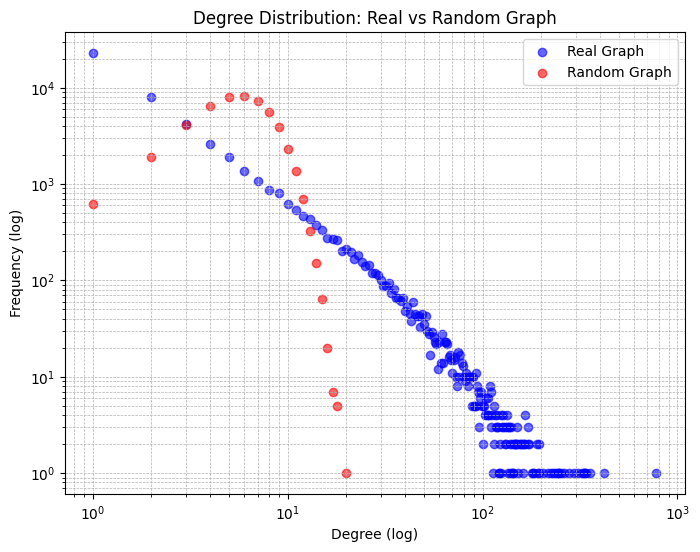

In [ ]:

def plot_degree_distribution(G, label, color):
    degrees = [d for n, d in G.degree()]
    degree_count = np.bincount(degrees)
    x = np.nonzero(degree_count)[0]
    y = degree_count[x]
    plt.scatter(x, y, label=label, alpha=0.6, marker='o', color=color)

plt.figure(figsize=(8, 6))
plot_degree_distribution(G_real, 'Real Graph', 'blue')
plot_degree_distribution(G_random, 'Random Graph', 'red')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (log)")
plt.ylabel("Frequency (log)")
plt.title("Degree Distribution: Real vs Random Graph")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

In [ ]:

real_cc = nx.average_clustering(G_real)
rand_cc = nx.average_clustering(G_random)

print(f"Average Clustering Coefficient:")
print(f"  Real Graph:   {real_cc:.4f}")
print(f"  Random Graph: {rand_cc:.4f}")

Average Clustering Coefficient:
  Real Graph:   0.1146
  Random Graph: 0.0001


### MAX, MIN nad AVG degree in the graph

In [7]:
degrees = dict(G_real.degree())

max_degree_node = max(degrees, key=degrees.get)
min_degree_node = min(degrees, key=degrees.get)

print(f"Max degree: {degrees[max_degree_node]} (Node ID: {max_degree_node})")
print(f"Min degree: {degrees[min_degree_node]} (Node ID: {min_degree_node})")


Max degree: 780 (Node ID: 5aIqB5nVVvmFsvSdExz408)
Min degree: 1 (Node ID: 6UWxthoCqcdENJe8DDyE1f)


In [8]:
total_degree = sum(dict(G_real.degree()).values())
average_degree = total_degree / n_nodes

print(f"Average Degree: {average_degree:.2f}")

Average Degree: 6.20


### Top 10 Artists by followers

In [11]:
import pandas as pd

combined = pd.read_csv('/kaggle/input/music-data/combined_dataset.csv')
top_artists = combined.sort_values(by='followers', ascending=False).head(10)
print(top_artists[['name', 'followers']].reset_index(drop=True))


            name    followers
0     Ed Sheeran  102156853.0
1  Ariana Grande   83045090.0
2  Billie Eilish   68407227.0
3          Drake   66852536.0
4  Justin Bieber   65590075.0
5         Eminem   59184634.0
6   Taylor Swift   58554324.0
7   Arijit Singh   58523986.0
8      Bad Bunny   55669387.0
9            BTS   54532917.0


### Top 10 Artists by their popularity

In [12]:
top_popular_artists = combined.sort_values(by='popularity', ascending=False).head(10)

print(top_popular_artists[['name', 'popularity']].reset_index(drop=True))


            name  popularity
0      Bad Bunny         100
1          Drake          95
2   Taylor Swift          94
3     The Weeknd          93
4   Harry Styles          91
5            BTS          91
6     Kanye West          91
7     Ed Sheeran          90
8  Justin Bieber          90
9         Eminem          90
